## **콘크리트 압축 강도**
> **Cement** 시멘트  
> **Blast Furnace Slag** 고로슬래그  
> **Fly Ash** 플라이 애시  
> **Water** 물  
> **Superplasticizer** 고분자 감수제  
> **Coarse Aggregate** 거친 골재  
> **Fine Aggregate** 미세 골재  
> **Age (day)** 시편이 형성된 후 경과한 시간  
> **Concrete compressive strength** 콘크리트 압축 강도  

In [1]:
import pandas as pd

c_df = pd.read_csv("./datasets/Concrete Compressive Strength.csv")
c_df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


#### **데이터 확인**

In [2]:
# 데이터 확인
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age (day)                       1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [3]:
# 결측치 확인
c_df.isna().sum()

Cement                            0
Blast Furnace Slag                0
Fly Ash                           0
Water                             0
Superplasticizer                  0
Coarse Aggregate                  0
Fine Aggregate                    0
Age (day)                         0
Concrete compressive strength     0
dtype: int64

In [4]:
# 중복행 검사
c_df.duplicated().sum()

25

In [5]:
# 중복행 삭제
c_df = c_df.drop_duplicates()
c_df.duplicated().sum()

0

#### **데이터 전처리**

In [6]:
# 데이터 복사
pre_c_df = c_df.copy()

array([[<Axes: title={'center': 'Cement'}>,
        <Axes: title={'center': 'Blast Furnace Slag'}>,
        <Axes: title={'center': 'Fly Ash'}>],
       [<Axes: title={'center': 'Water'}>,
        <Axes: title={'center': 'Superplasticizer'}>,
        <Axes: title={'center': 'Coarse Aggregate'}>],
       [<Axes: title={'center': 'Fine Aggregate'}>,
        <Axes: title={'center': 'Age (day)'}>,
        <Axes: title={'center': 'Concrete compressive strength '}>]],
      dtype=object)

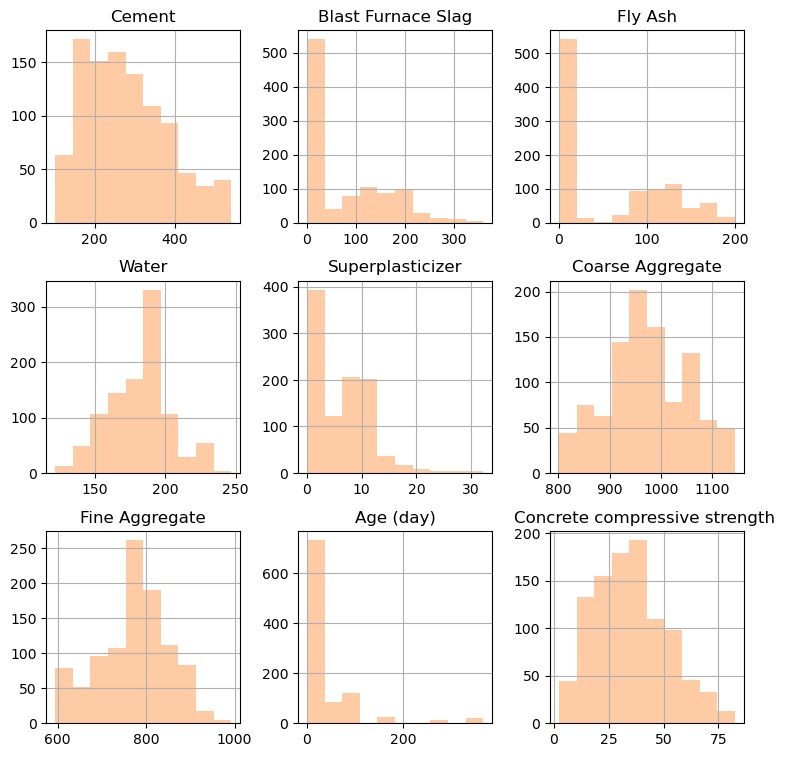

In [7]:
#히스토그램 그려보기
pre_c_df.hist(figsize=(9,9), color='#FFCBA4')

### **📊1Cycle**

In [8]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [10]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 116.2104, RMSE: 10.7801, MSLE: 0.1057, RMSLE: 0.3250, R2: 0.5442


In [11]:
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=0)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [12]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 58.4785, RMSE: 7.6471, MSLE: 0.0624, RMSLE: 0.2498, R2: 0.7770


In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 36.8723, RMSE: 6.0723, MSLE: 0.0425, RMSLE: 0.2063, R2: 0.8554
RandomForestRegressor
MSE: 21.9056, RMSE: 4.6803, MSLE: 0.0231, RMSLE: 0.1518, R2: 0.9141
GradientBoostingRegressor
MSE: 22.1132, RMSE: 4.7025, MSLE: 0.0239, RMSLE: 0.1546, R2: 0.9133
XGBRegressor
MSE: 14.9316, RMSE: 3.8641, MSLE: 0.0177, RMSLE: 0.1332, R2: 0.9414
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1083
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 8
[LightGBM] [Info] Start training from score 35.086463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


### **📝1Cycle 결과**
>   
>   

In [ ]:
# Linear MSE: 116.2104, RMSE: 10.7801, MSLE: 0.1057, RMSLE: 0.3250, R2: 0.5442
# Poly MSE: 58.4785, RMSE: 7.6471, MSLE: 0.0624, RMSLE: 0.2498, R2: 0.7770
# XGBRegressor MSE: 14.9316, RMSE: 3.8641, MSLE: 0.0177, RMSLE: 0.1332, R2: 0.9414

In [ ]:
# LinearRegression보다 PolynomialFeatures의 결과가 좋으며 비선형 데이터에 가깝다고 할 수 있다
# 독립변수간의 상관관계와 OLS, VIF를 확인해본다